In [28]:
import pandas as pd

data = pd.read_csv('default of credit card clients.csv')

X = data.iloc[:,1:24]
Y = data['default payment next month']
final_performances = []
final_algs = []

data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [30]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [29]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [31]:
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E749D07730>,
      dtype=object)

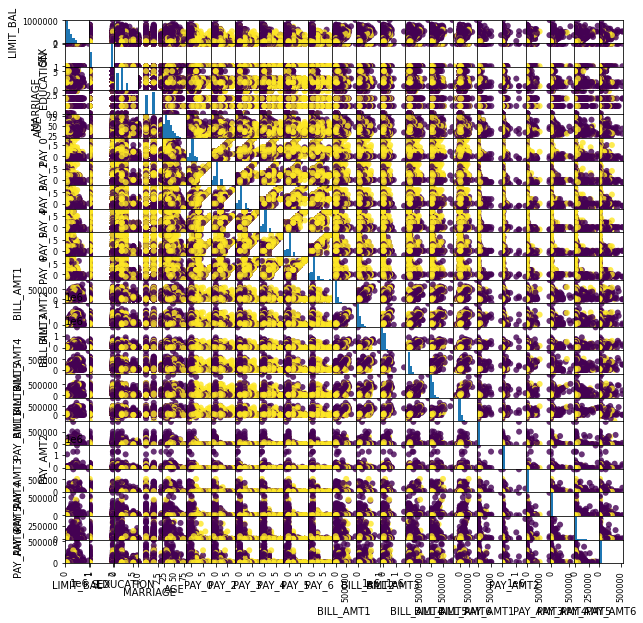

In [32]:
%matplotlib inline
from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize = (10, 10), c = Y, alpha = 0.8, marker = 'O')


In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
#Split the data into training and testing sets.
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

#Scaling the data because the data varies a lot(check X.describe())
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

In [35]:
X_train_org

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3225,20000,2,3,1,44,0,0,2,0,0,...,17980,18780,0,0,3000,0,1000,1000,0,0
11815,260000,2,2,2,30,-1,-1,-1,-1,-1,...,274,165,333,165,165,274,165,333,165,293
7338,20000,1,2,1,39,2,0,0,0,0,...,19299,19928,20204,20398,1500,1500,900,700,1480,0
14980,30000,1,2,1,23,2,2,2,2,2,...,28635,30127,30525,29793,1800,150,2250,1000,0,700
27167,10000,1,2,1,29,0,0,0,0,0,...,8600,9470,6690,9690,2800,2000,1500,900,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30000,1,2,2,38,0,0,0,0,0,...,18432,17844,18237,10900,2100,2500,1000,1000,3000,7002
19648,210000,2,1,1,33,0,0,0,0,0,...,192717,195700,150525,137565,7000,7791,7000,5254,5400,5380
9845,130000,2,3,1,43,0,0,0,0,0,...,66370,43882,41063,29215,5000,3000,2500,4100,0,5000
10799,50000,2,3,1,29,0,0,0,0,0,...,49054,7378,8103,8963,2500,3125,417,1000,1000,500


In [49]:
X_train_org.iloc[:,0:20]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3
3225,20000,2,3,1,44,0,0,2,0,0,-2,17095,19112,17980,18780,0,0,3000,0,1000
11815,260000,2,2,2,30,-1,-1,-1,-1,-1,-1,165,165,274,165,333,165,165,274,165
7338,20000,1,2,1,39,2,0,0,0,0,0,20264,20328,19299,19928,20204,20398,1500,1500,900
14980,30000,1,2,1,23,2,2,2,2,2,2,28224,29276,28635,30127,30525,29793,1800,150,2250
27167,10000,1,2,1,29,0,0,0,0,0,0,8275,8409,8600,9470,6690,9690,2800,2000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30000,1,2,2,38,0,0,0,0,0,0,26825,18401,18432,17844,18237,10900,2100,2500,1000
19648,210000,2,1,1,33,0,0,0,0,0,0,199851,190551,192717,195700,150525,137565,7000,7791,7000
9845,130000,2,3,1,43,0,0,0,0,0,2,74020,71527,66370,43882,41063,29215,5000,3000,2500
10799,50000,2,3,1,29,0,0,0,0,0,0,45561,47322,49054,7378,8103,8963,2500,3125,417


In [50]:
# Minmax scaler returns a numpy array - convert it back to a dataframe just to look at it
dataframe = pd.DataFrame(X_train, columns = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"])
dataframe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.012658,1.0,0.500000,0.333333,0.396552,0.2,0.222222,0.4,0.2,0.2,...,0.096216,0.215290,0.089884,0.326684,0.003434,0.000000,0.001125,0.001610,0.000000,0.000000
1,0.316456,1.0,0.333333,0.666667,0.155172,0.1,0.111111,0.1,0.1,0.1,...,0.086495,0.194061,0.090252,0.326842,0.000189,0.000163,0.000186,0.000536,0.000425,0.000556
2,0.012658,0.0,0.333333,0.333333,0.310345,0.4,0.222222,0.2,0.2,0.2,...,0.096941,0.216599,0.112212,0.346306,0.001717,0.000891,0.001012,0.001127,0.003814,0.000000
3,0.025316,0.0,0.333333,0.333333,0.034483,0.4,0.444444,0.4,0.4,0.4,...,0.102066,0.228230,0.123618,0.355343,0.002061,0.000089,0.002531,0.001610,0.000000,0.001328
4,0.000000,0.0,0.333333,0.333333,0.137931,0.2,0.222222,0.2,0.2,0.2,...,0.091066,0.204673,0.097278,0.336005,0.003205,0.001187,0.001687,0.001449,0.007731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.025316,0.0,0.333333,0.666667,0.293103,0.2,0.222222,0.2,0.2,0.2,...,0.096465,0.214223,0.110039,0.337169,0.002404,0.001484,0.001125,0.001610,0.007731,0.013283
23996,0.253165,1.0,0.166667,0.333333,0.206897,0.2,0.222222,0.2,0.2,0.2,...,0.192154,0.417054,0.256233,0.459015,0.008013,0.004626,0.007874,0.008461,0.013915,0.010206
23997,0.151899,1.0,0.500000,0.333333,0.379310,0.2,0.222222,0.2,0.2,0.2,...,0.122785,0.243917,0.135264,0.354787,0.005724,0.001781,0.002812,0.006602,0.000000,0.009485
23998,0.050633,1.0,0.500000,0.333333,0.137931,0.2,0.222222,0.2,0.2,0.2,...,0.113277,0.202287,0.098839,0.335306,0.002862,0.001855,0.000469,0.001610,0.002577,0.000949


In [51]:
import numpy as np

corr_list = []; #Correlation list- Which features have the biggest role in the accuracy of the model. Higher -> More important.
for i in range(0,4):
    corr_list.append(np.corrcoef(X_train[:,i], y_train)[0,1]) #Get all the rows and the ith column.
print(corr_list)

[-0.14934780512931628, -0.044936450795175796, 0.024799439847850772, -0.031548237782026756]


In [52]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(kernel='linear')

In [53]:
print("Training Accuracy:",svclassifier.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", svclassifier.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8069583333333333
Testing Accuracy: 0.8171666666666667


In [54]:
# Try it with a Radial Basis Function
rbfclassifier = SVC()
rbfclassifier.fit(X_train, y_train)
print("RBF Training Accuracy:", rbfclassifier.score(X_train, y_train))
print("RBF Testing Accuracy:", rbfclassifier.score(X_test, y_test))

RBF Training Accuracy: 0.8173333333333334
RBF Testing Accuracy: 0.8106666666666666
